In [1]:
import pandas as pd
import numpy as n
import matplotlib as mp
import seaborn as sns
#Import statements for all of the packages referenced
#import sklearn as sc

In [4]:
#df_details: outputs labeled dataframe details. 
def df_details(df):
    print("Description of DataFrame: ")
    print(df.describe())
    print("DataFrame Head: ")
    print(df.head())
    print("DataFrame Columns: ")
    print(df.columns)

In [5]:
#Import and build data frame with the data from the package
#Link to data : https://www.census.gov/econ/bfs/data/weekly.html
#Data Set :  Not Adjusted State Business Applications  
#Link to data dictionary: https://www.census.gov/econ/bfs/pdf/bfs_weekly_data_dictionary.pdf
rf = pd.read_csv("region_bfa.csv")
df = pd.DataFrame(rf)
df_details(df)

Description of DataFrame: 
              Year         Week      Fregion        BA_NSA       HBA_NSA  \
count  4048.000000  4048.000000  4048.000000   4048.000000   4048.000000   
mean   2015.209486    26.226285     2.500000  16591.474802   6603.670949   
std       5.610325    15.067960     1.118172  10176.457505   3243.219086   
min    2006.000000     1.000000     1.000000    670.000000    330.000000   
25%    2010.000000    13.000000     1.750000   9810.000000   4300.000000   
50%    2015.000000    26.000000     2.500000  13340.000000   5440.000000   
75%    2020.000000    39.000000     3.250000  20100.000000   8445.000000   
max    2025.000000    53.000000     4.000000  65300.000000  21990.000000   

            WBA_NSA       CBA_NSA    YY_BA_NSA   YY_HBA_NSA   YY_WBA_NSA  \
count   4048.000000   4048.000000  3832.000000  3832.000000  3832.000000   
mean    2790.427372   2962.976779     6.370506     3.404061    -0.311114   
std     1397.844360   1310.505180    35.713121    33.516515 

<Axes: xlabel='Fregion'>

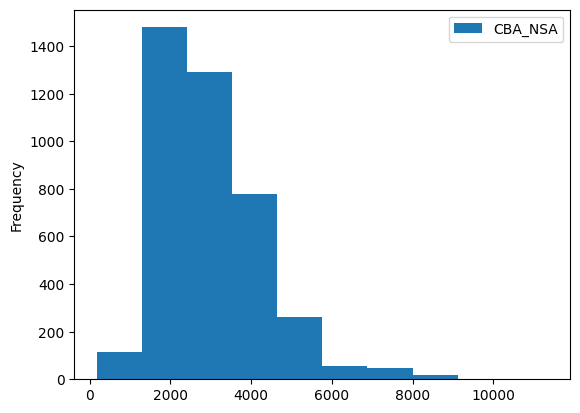

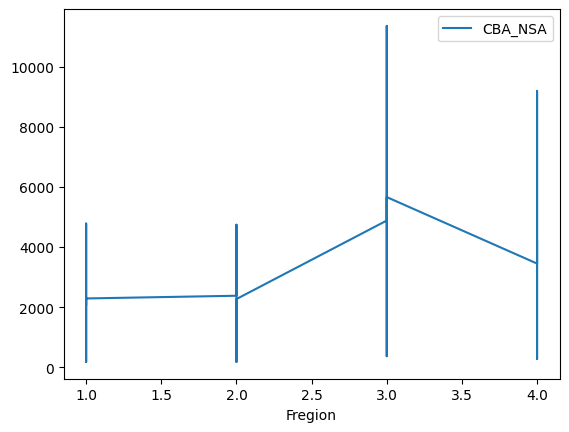

In [7]:
df.plot(kind='hist',x='Fregion',y='CBA_NSA') #Histogram plot to Show Corporate Business Applications based on Region
df.plot(kind='line',x='Fregion',y='CBA_NSA') #Line plot to show Corporate Business Applications based on Region

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Week'}>,
        <Axes: title={'center': 'Fregion'}>],
       [<Axes: title={'center': 'BA_NSA'}>,
        <Axes: title={'center': 'HBA_NSA'}>,
        <Axes: title={'center': 'WBA_NSA'}>],
       [<Axes: title={'center': 'CBA_NSA'}>,
        <Axes: title={'center': 'YY_BA_NSA'}>,
        <Axes: title={'center': 'YY_HBA_NSA'}>],
       [<Axes: title={'center': 'YY_WBA_NSA'}>,
        <Axes: title={'center': 'YY_CBA_NSA'}>, <Axes: >]], dtype=object)

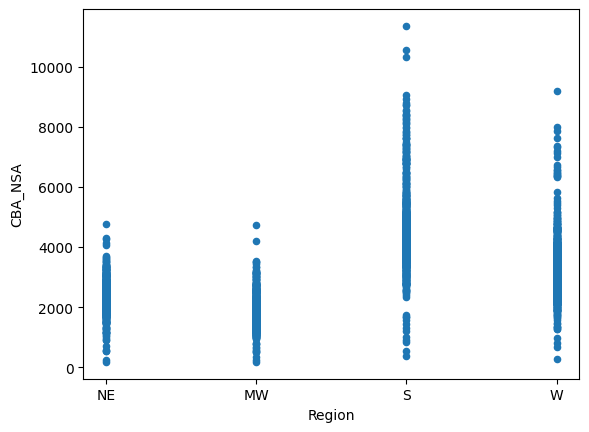

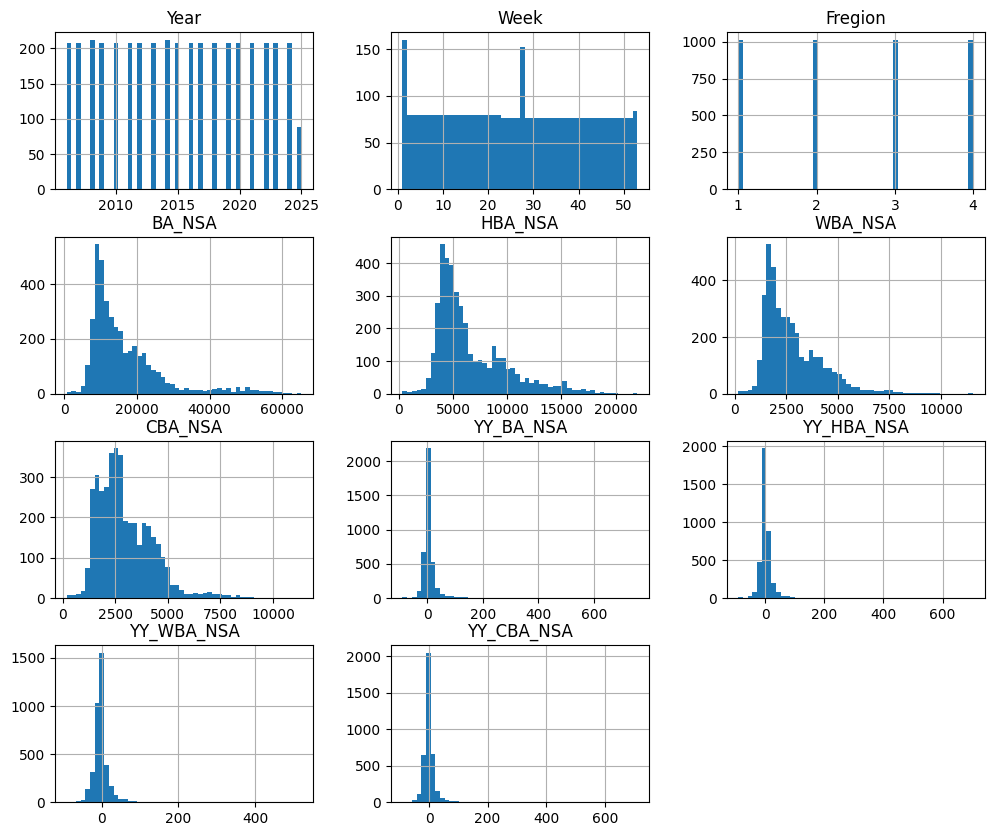

In [7]:
df.plot(kind='scatter',x='Region',y='CBA_NSA') #Scatter plot of Region grouped Corporate Business License Applications
df.hist(bins=50, figsize=(12,10))

In [8]:
#Correlation Matrix to show metrics in relevance of the Corporate Business License Applications
corr_matrix = df.corr(numeric_only=True) 
corr_matrix["CBA_NSA"].sort_values(ascending=False)

CBA_NSA       1.000000
WBA_NSA       0.888277
HBA_NSA       0.844444
BA_NSA        0.620116
Fregion       0.450375
YY_CBA_NSA    0.148149
YY_HBA_NSA    0.100446
YY_BA_NSA     0.083063
YY_WBA_NSA    0.069355
Year         -0.114767
Week         -0.202407
Name: CBA_NSA, dtype: float64

array([[<Axes: xlabel='CBA_NSA', ylabel='CBA_NSA'>,
        <Axes: xlabel='BA_NSA', ylabel='CBA_NSA'>,
        <Axes: xlabel='Fregion', ylabel='CBA_NSA'>,
        <Axes: xlabel='Year', ylabel='CBA_NSA'>,
        <Axes: xlabel='WBA_NSA', ylabel='CBA_NSA'>,
        <Axes: xlabel='YY_BA_NSA', ylabel='CBA_NSA'>,
        <Axes: xlabel='YY_CBA_NSA', ylabel='CBA_NSA'>],
       [<Axes: xlabel='CBA_NSA', ylabel='BA_NSA'>,
        <Axes: xlabel='BA_NSA', ylabel='BA_NSA'>,
        <Axes: xlabel='Fregion', ylabel='BA_NSA'>,
        <Axes: xlabel='Year', ylabel='BA_NSA'>,
        <Axes: xlabel='WBA_NSA', ylabel='BA_NSA'>,
        <Axes: xlabel='YY_BA_NSA', ylabel='BA_NSA'>,
        <Axes: xlabel='YY_CBA_NSA', ylabel='BA_NSA'>],
       [<Axes: xlabel='CBA_NSA', ylabel='Fregion'>,
        <Axes: xlabel='BA_NSA', ylabel='Fregion'>,
        <Axes: xlabel='Fregion', ylabel='Fregion'>,
        <Axes: xlabel='Year', ylabel='Fregion'>,
        <Axes: xlabel='WBA_NSA', ylabel='Fregion'>,
        <Axes: xlab

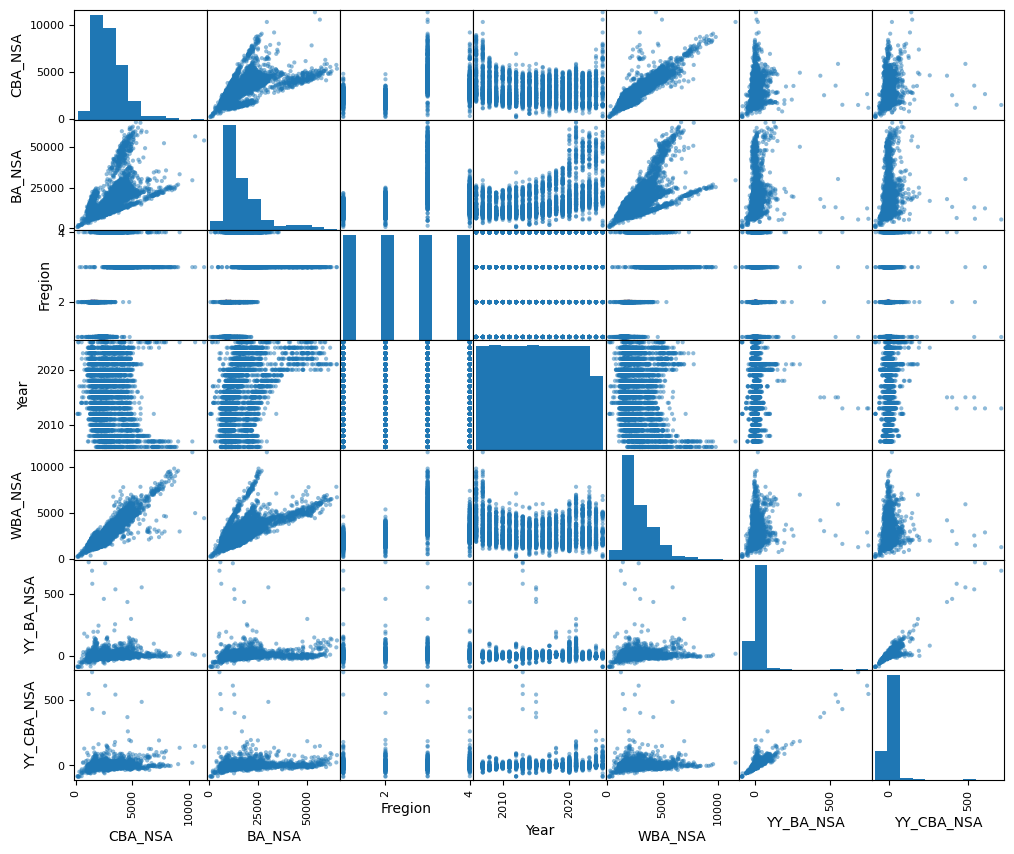

In [9]:
from pandas.plotting import scatter_matrix

#plotting the Corporate Business Licenses against the other variables aligning to the correlation matrix to identify trends.
features = ["CBA_NSA","BA_NSA","Fregion","Year","WBA_NSA", "YY_BA_NSA","YY_CBA_NSA"]
scatter_matrix(df[features],figsize=(12,10))

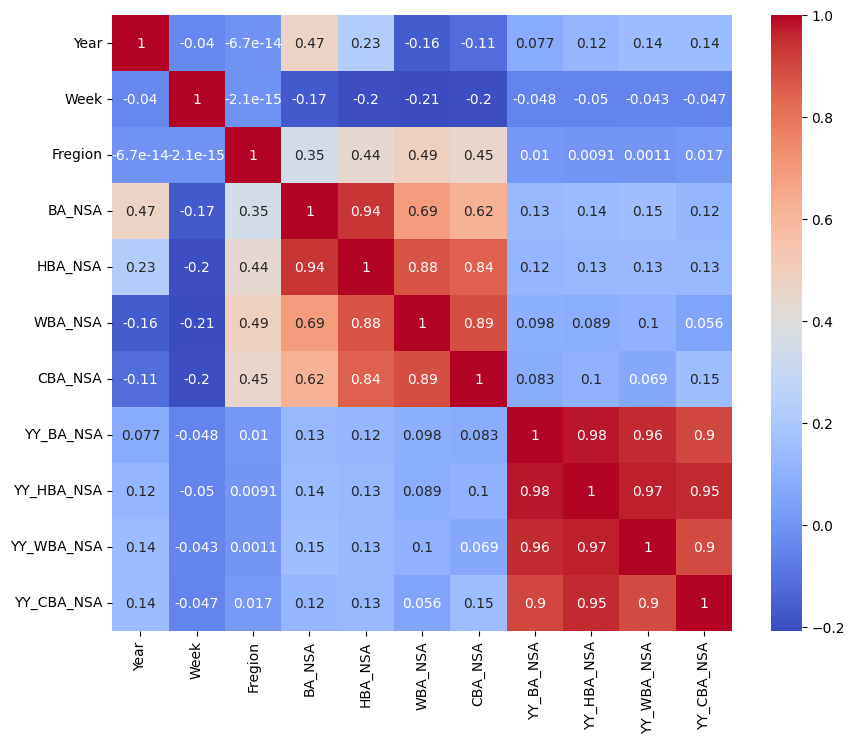

In [10]:
import seaborn as sns
#heatmap chart to identify closest potential correlation values
mp.pyplot.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
mp.pyplot.show()

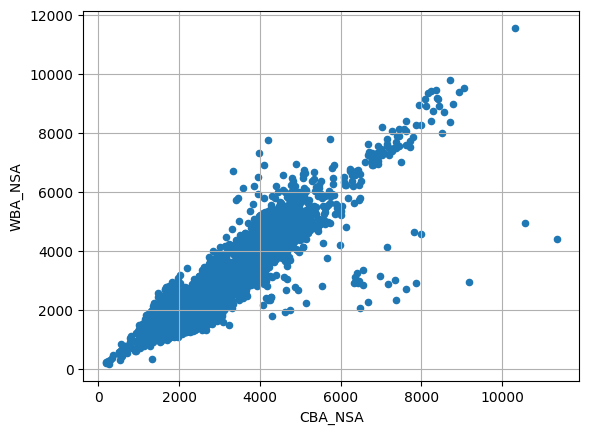

In [8]:
#Scatter Plot showing the relationship between Corporate Business and Wage Businesses
df.plot(kind="scatter",x="CBA_NSA",y="WBA_NSA", grid=True)
mp.pyplot.show()

In [25]:
#isolating data from non-quantitative inputs
data_df = df.drop(columns=['Region'])
data_df = data_df.dropna()
df_details(data_df)

Description of DataFrame: 
              Year         Week     Fregion        BA_NSA       HBA_NSA  \
count  3832.000000  3832.000000  3832.00000   3832.000000   3832.000000   
mean   2015.718163    26.155532     2.50000  16827.620042   6573.870042   
std       5.322676    15.036919     1.11818  10330.707128   3240.086328   
min    2007.000000     1.000000     1.00000    670.000000    330.000000   
25%    2011.000000    13.000000     1.75000   9890.000000   4250.000000   
50%    2016.000000    26.000000     2.50000  13490.000000   5400.000000   
75%    2020.000000    39.000000     3.25000  20300.000000   8392.500000   
max    2025.000000    52.000000     4.00000  65300.000000  21990.000000   

            WBA_NSA       CBA_NSA    YY_BA_NSA   YY_HBA_NSA   YY_WBA_NSA  \
count   3832.000000   3832.000000  3832.000000  3832.000000  3832.000000   
mean    2701.631002   2899.457203     6.370506     3.404061    -0.311114   
std     1295.423133   1234.104284    35.713121    33.516515    30.558

In [26]:
#setting the isolated test data sets, setting Commercial business applications
X, y= data_df, data_df['CBA_NSA']
print(X)
print(y)

      Year  Week  Fregion  BA_NSA  HBA_NSA  WBA_NSA  CBA_NSA  YY_BA_NSA  \
52    2007     1        1    7120     4060     2320     2440       5.33   
53    2007     2        1    3040     1830     1080     1150     -51.59   
54    2007     3        1   13610     7980     4560     4780      21.63   
55    2007     4        1    8870     5040     2760     3000       0.57   
56    2007     5        1   10130     5700     3090     3360      -5.42   
...    ...   ...      ...     ...      ...      ...      ...        ...   
4043  2025    18        4   27520     9200     2880     3880       5.28   
4044  2025    19        4   28500    11540     2910     6330       6.50   
4045  2025    20        4   29040    12760     2720     7620      20.25   
4046  2025    21        4   26130     9860     2690     4940       5.83   
4047  2025    22        4   22310     8480     2330     4210       3.82   

      YY_HBA_NSA  YY_WBA_NSA  YY_CBA_NSA  
52          8.56        2.20       16.75  
53        -51

In [27]:
from sklearn.model_selection import train_test_split
#Create the train test split of data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [28]:
from sklearn import linear_model
#Train the linear regression model on the train / test split
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

In [29]:
from sklearn.metrics import root_mean_squared_error
#retrieve the results of the linear regression model.
lm_predict = slr.predict(X_test)
lm_r2 = slr.score(X_test, y_test)
lm_rmse = root_mean_squared_error(y_test,lm_predict)


In [30]:
#Results print out
print(lm_predict) #predicted dataset
print(y_test) #test dataset
print("lm_r2:",lm_r2)
print("lm_rmse:",lm_rmse)

[2670. 3370. 1940. 5480. 3420. 2320. 2890. 4100. 2430. 1840. 2250. 1990.
 1880. 4170. 4010. 2690. 3780. 3050. 1460. 3640. 2490. 1860. 1600. 1250.
 2710. 1520. 4370. 5040. 1480. 4390. 5140. 1330. 2240. 6800. 4520. 3490.
 1550. 2080. 5420. 3880. 3680. 1710. 1760. 3270. 1670. 1930. 2180. 4680.
 4760. 2840. 1360. 2170. 1820. 3630. 3160. 1510. 3830. 1910. 2470. 1670.
 1930. 4570. 1420. 1580. 1690. 1720. 1680. 4550. 1980. 1140. 1800. 2100.
 2980. 4230. 2020. 2590. 4080. 1830. 4180. 5070. 4470. 4300. 1690. 3490.
 3520. 2240. 4540. 3930. 2370. 1540. 2160. 4640. 2000. 1960. 4200. 1980.
 2700. 1950. 2960. 2110. 3500. 3730. 2130. 2550. 2380. 3580. 2730. 3250.
 2120. 2860. 5790. 2380. 1690. 3210. 2570. 1460. 4210. 4120. 2800. 1620.
 4560. 5880.  700. 2310. 3000. 3560. 1700. 4060. 4010. 4520. 2700. 4120.
 1630. 2490. 2660. 2230. 3470. 2340. 1110. 3600. 2710. 2630. 2740. 1590.
 4180. 1650. 5520. 4810. 1350. 2720. 4500. 4080. 3040. 2960. 2270. 1160.
 3490. 1540. 3890. 4870. 2690. 1730. 2310. 4550. 36